In [2]:
import numpy as np
import matplotlib.pyplot as plt
import heapq

In [3]:
# Métrica de distancia: Euclidiana
def euclidean_distance(P, Q):
    return np.sqrt(np.sum((P - Q) ** 2))

In [4]:
# KNN Secuencial
def knn_sequential(data, query, k):
    distances = [(euclidean_distance(point, query), idx) for idx, point in enumerate(data)]
    distances.sort(key=lambda x: x[0])
    return distances[:k]

In [5]:
# KNN con Cola de Prioridad
def knn_priority_queue(data, query, k):
    heap = []
    for idx, point in enumerate(data):
        distance = euclidean_distance(point, query)
        if len(heap) < k:
            heapq.heappush(heap, (-distance, idx))
        else:
            if -heap[0][0] > distance:
                heapq.heapreplace(heap, (-distance, idx))
    return [(-d, idx) for d, idx in heap]

In [6]:
# Búsqueda por Rango
def range_search(data, query, radius):
    results = []
    for idx, point in enumerate(data):
        distance = euclidean_distance(point, query)
        if distance <= radius:
            results.append((distance, idx))
    return results

In [7]:
# Análisis de distribución de distancias
def analyze_distance_distribution(data, query, radii):
    distances = [euclidean_distance(point, query) for point in data]
    plt.hist(distances, bins=30, alpha=0.7, label="Distancias")
    plt.xlabel("Distancia")
    plt.ylabel("Frecuencia")
    plt.title("Distribución de Distancias")
    plt.legend()
    plt.show()
    
    # Experimentos con diferentes radios
    for radius in radii:
        points_in_radius = range_search(data, query, radius)
        print(f"Radio: {radius}, Puntos encontrados: {len(points_in_radius)}")

In [8]:
# Dataset de ejemplo
np.random.seed(42)
data = np.random.rand(100, 2) * 10  # 100 puntos aleatorios en un rango de 0-10
query_point = np.array([5, 5])  # Punto de consulta
k = 10  # Número de vecinos más cercanos
radii = [2, 3, 5]  # Valores de radio para experimentos

In [9]:
# Ejecución de los métodos
print("KNN Secuencial:")
print(knn_sequential(data, query_point, k))

KNN Secuencial:
[(np.float64(0.7594132967118037), 48), (np.float64(1.0959708228743663), 73), (np.float64(1.3823896584008788), 81), (np.float64(1.8584175663497666), 51), (np.float64(1.870458040229493), 80), (np.float64(1.8935533882465698), 23), (np.float64(1.9370991730785896), 19), (np.float64(1.9731695403252687), 8), (np.float64(1.9914069956001113), 71), (np.float64(2.0388669681071434), 68)]


In [10]:
print("\nKNN con Cola de Prioridad:")
print(knn_priority_queue(data, query_point, k))


KNN con Cola de Prioridad:
[(np.float64(2.0388669681071434), 68), (np.float64(1.9914069956001113), 71), (np.float64(1.9370991730785896), 19), (np.float64(1.9731695403252687), 8), (np.float64(1.870458040229493), 80), (np.float64(1.0959708228743663), 73), (np.float64(0.7594132967118037), 48), (np.float64(1.8935533882465698), 23), (np.float64(1.8584175663497666), 51), (np.float64(1.3823896584008788), 81)]


In [11]:
print("\nBúsqueda por Rango:")
for radius in radii:
    print(f"Radio {radius}: {range_search(data, query_point, radius)}")


Búsqueda por Rango:
Radio 2: [(np.float64(1.9731695403252687), 8), (np.float64(1.9370991730785896), 19), (np.float64(1.8935533882465698), 23), (np.float64(0.7594132967118037), 48), (np.float64(1.8584175663497666), 51), (np.float64(1.9914069956001113), 71), (np.float64(1.0959708228743663), 73), (np.float64(1.870458040229493), 80), (np.float64(1.3823896584008788), 81)]
Radio 3: [(np.float64(2.521005464913762), 1), (np.float64(2.3134053520842524), 4), (np.float64(1.9731695403252687), 8), (np.float64(2.1958313320943117), 9), (np.float64(2.4710929577902934), 11), (np.float64(2.8853972905497964), 12), (np.float64(1.9370991730785896), 19), (np.float64(2.908618059981832), 22), (np.float64(1.8935533882465698), 23), (np.float64(2.5431085525713284), 30), (np.float64(2.231874650668454), 32), (np.float64(2.574656357683593), 42), (np.float64(2.6765846718654567), 43), (np.float64(2.678875445482463), 46), (np.float64(2.7103820254163624), 47), (np.float64(0.7594132967118037), 48), (np.float64(1.858417


Análisis de Distribución de Distancias:


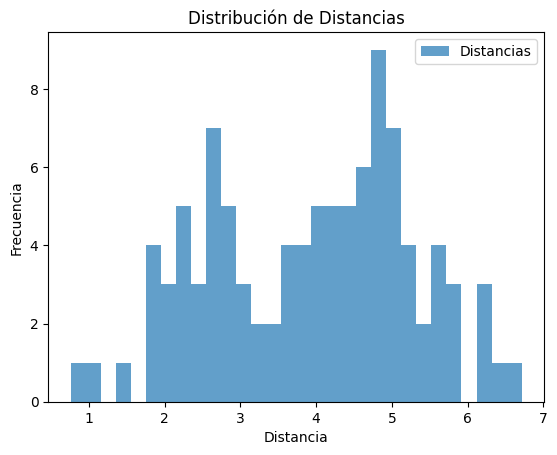

Radio: 2, Puntos encontrados: 9
Radio: 3, Puntos encontrados: 30
Radio: 5, Puntos encontrados: 76


In [12]:
print("\nAnálisis de Distribución de Distancias:")
analyze_distance_distribution(data, query_point, radii)
